Creative Commons CC BY 4.0 Lynd Bacon & Associates, Ltd.  Not warranted to be suitable for any particular purpose. (You're on your own!)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

## Basic Linear Regression for ML

The wildly popular, basic model for a single observation i:  

\begin{align*}
\large
y_i = X_{i}{\rm B}+\epsilon_i
\end{align*}

Where $X_i$  is (possibly) a vector of predictor variable values, ${rm B}$ is a vector of estimated coefficients, and $\epsilon_i$ is an error term, $y_i - \hat{y_i}$. 

In statistical applications, it's not uncommon to state this model like:

\begin{align*}
\large
y_i \sim N(X_{i}{\rm B},\sigma_{\epsilon}^2)
\end{align*}

where some model assumptions are evident.


## The Purpose of Estimation Is the Key Difference

Linear regression is typically used in statistical contexts for _explanation_, _hypothesis testing_, and/or _causal inference_.  In these contexts, you might say that the $\epsilon_i$'s are used for _inference_. Model assumptions, like the homogeneity of error variances assumption, are critical to making valid conclusions.

Linear regression is used for _predicting_ in a ML application.  The general goal is to make the $\epsilon_I$'s as small as possible.  A frequently accompanying objective is that they aren't a lot bigger when the estimated, or _trained_, regression model is applied to predict $y_i$'s in new data obtained from the same population of observations.

## Linear Regression for Prediction

Let's use the inpatient satisfaction data again.  Input the data from the csv file into a numpy array. Assuming that the file `DECART-patSat.csv` is in the pwd ("present working directory"):

In [2]:
# ptNumA has a header record with var names for the cols
ptNumA=np.genfromtxt('DATA/ML/DECART-patSat.csv', delimiter=",",skip_header=1)

`ptNumA` is a [numpy](https://www.numpy.org/) array, with rows and columns:

In [3]:
type(ptNumA)
ptNumA.shape

numpy.ndarray

(1811, 11)

Here's a look at the first five rows of the data in `ptNumA`:

In [4]:
ptNumA[:5,:]

array([[ 0.,  2.,  8.,  8.,  2.,  2.,  2.,  6.,  8.,  6.,  0.],
       [ 1.,  7.,  8.,  8.,  7.,  6.,  8.,  9.,  8., 10.,  2.],
       [ 2.,  5.,  3.,  3.,  3.,  5.,  4.,  4.,  7.,  7.,  0.],
       [ 3.,  8.,  7.,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  1.],
       [ 4.,  2.,  1.,  1.,  1.,  1., 10.,  2., 10.,  8.,  0.]])

That first column is the variable `caseID`, an unique but arbitrary record identifier. (No HIPAA, no HIPAA!)  

Let's remove it to avoid confusing it later with response data:

In [5]:
ptNumA2=ptNumA[:,1:]
ptNumA2.shape
ptNumA2[:,1].min()

(1811, 10)

1.0

We need to get some methods to do a regression.  We'll use some methods from [scikit-learn](https://scikit-learn.org/stable/), arguably the most popular Python package for ML.

In [6]:
from sklearn import linear_model  # OLS 
from sklearn.metrics import mean_squared_error, r2_score # Basic metrics

We'll "train" a model using _ordinary_least_squares_ using scikit-learn's [Linear Regression function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).  Note that the input parameters are _positional_: the first is the predictor,or "X", variables.  The second is "y".  Note the defaults, e.g. intercept, not "normalized."  The `n_jobs` parameter allows using multiple processors.

In [7]:
regr=linear_model.LinearRegression()  #creates an instance of the fcn
regr.fit(ptNumA2[:,2:],ptNumA2[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's get some basic fit measures. These are select from [scikit-learn metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics):

In [9]:
regrPredY=regr.predict(ptNumA2[:,2:])  # values of y predicted by model
MSE=mean_squared_error(ptNumA2[:,1],regrPredY)  # calculated MSE
R2=r2_score(ptNumA2[:,1],regrPredY)  # coef of determination

In [10]:
print('MSE: %4.2f' % MSE)
print('R2: %3.2f' % R2)

MSE: 2.29
R2: 0.67


A quick look at a scatterplot:

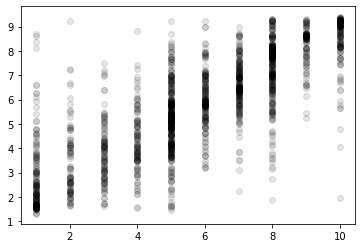

In [11]:
plt.scatter(ptNumA2[:,1],regrPredY,color='black',alpha=.1)

Meh.  Could be a little better by adding a regression line?  We need to get intercept and slope estimates:

In [12]:
# This gets slope and intercept estimates:

slp, inter = np.polyfit(ptNumA2[:,1],regrPredY,deg=1)

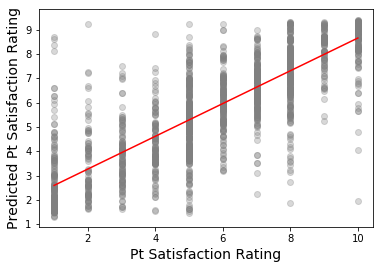

In [13]:
linf=lambda x: slp*x+inter # line generating function

x=np.array([1,10])  # Two points determine a line?

plt.scatter(ptNumA2[:,1],regrPredY,color='grey',alpha=.3);
plt.plot(x,linf(x),c="red");  # note the linf fcn for y, here.

plt.xlabel('Pt Satisfaction Rating',fontsize=14);
plt.ylabel('Predicted Pt Satisfaction Rating',fontsize=14);


## Another UD4U: Lung CA Rate Regression using the radon Data

Try doing the above using the data in `radon.csv`.  Regress `lcanmort` on:

* `lnradon`
* `obesity`
* `over65`
* `evrsmoke`
* `hhincome`

"Train" your regression model, and get MSE and R<sup>2</sup> estimates for it.
